In [ ]:
pip install prince


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.9/415.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from prince import MCA

In [ ]:
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
data = pd.DataFrame(df)

In [ ]:
data = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [ ]:
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [ ]:
len(data.columns)

63

In [ ]:
data.describe(include='object')

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


In [ ]:
df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [ ]:
new_columns = {
    'Are you self-employed?': 'Self Employed',
    'How many employees does your company or organization have?': 'Number of employees',
    'Is your employer primarily a tech company/organization?': 'Tech Company',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'MH Coverage',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'MH Coverage Awareness',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'MH Discussion',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'MH Resources Provided',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'MH Anonimity',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'Medical Leave',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'MH Discuission Neg Impact',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'MH Discuission Coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'MH Discuission Supervisor(s)',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'MH as PH',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'MH Coworker Reveal Neg Impact',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'MH Bad Impact on Career',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'MH Neg View of Coworkers',
    'How willing would you be to share with friends and family that you have a mental illness?': 'MH Sharing Freinds/Family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'MH Bad Response',
    'Do you have a family history of mental illness?': 'MH Family History',
    'Have you had a mental health disorder in the past?': 'MH Disorder Past',
    'Do you currently have a mental health disorder?': 'Current MH Disorder',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'MH Diagnos Proffesional',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'MH Sought Proffes Treat',
    'What is your age?': 'Age',
    'What is your gender?': 'Gender',
    'What country do you live in?': 'Country',
    'What US state or territory do you live in?': 'US State',
    'What country do you work in?': 'Work Country',
    'What US state or territory do you work in?': 'Work US State',
    'Which of the following best describes your work position?': 'Work Position',
    'Do you work remotely?': 'Remote',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'PH Discuission Neg Impact',
    'Do you have previous employers?': 'Prev Employers',
    'Have your previous employers provided mental health benefits?': 'Prev MH Benefits',
    'Were you aware of the options for mental health care provided by yorevious employers?ur p': 'MH Awarness Prev',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'Prev MH Discussion',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'Prev MH Resources Provided',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'Prev MH Anonimity',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'Prev MH Discuission Neg Impact',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'Prev PH Discuission Neg Impact',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'Prev MH Discuission Coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'Prev MH Discuission Supervisor(s)',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'Prev MH as PH',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'Prev MH Coworker Reveal Neg Impact',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH in Interview',
    'Why or why not?': 'Why/why not',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'MH in Interview',
    'Why or why not?.1': 'Why/why not (1)',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'Less Reveal MH after observation',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'MH Effective Treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'MH NOT Effective Treatment', 'Is your primary role within your company related to tech/IT?': 'Tech Domain'
}

In [ ]:
data.rename(columns=new_columns,inplace=True)

In [ ]:
data

,Self Employed,Number of employees,Tech Company,Tech Domain,MH Coverage,MH Coverage Awareness,MH Discussion,MH Resources Provided,MH Anonimity,Medical Leave,...,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country,US State,Work Country,Work US State,Work Position,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [ ]:
data.isna().sum()

,0
Self Employed,0
Number of employees,287
Tech Company,287
Tech Domain,1170
MH Coverage,287
...,...
US State,593
Work Country,0
Work US State,582
Work Position,0


#Deleting every column with more than 550 missing values

In [ ]:
data.drop(data.columns[list(data.isna().sum() >= 550)],axis=1,inplace=True)

In [ ]:
data.isna().sum()

,0
Self Employed,0
Number of employees,287
Tech Company,287
MH Coverage,287
MH Coverage Awareness,420
MH Discussion,287
MH Resources Provided,287
MH Anonimity,287
Medical Leave,287
MH Discuission Neg Impact,287


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data)
cleaned_data = imputer.transform(data)
cleaned_df = pd.DataFrame(data=cleaned_data,columns=data.columns)

#Gender Handeling

In [ ]:
male = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', 'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male', 'cisdude', 'cis man', 'MALE',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "]
female = ['Female', 'female', 'female ',  'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F', ' Female', 'Cis-woman', 'AFAB',
          'Genderfluid (born female)',  'Female ', 'woman', 'female/woman', 'Cisgender Female', 'fem', 'female-bodied; no feelings about gender',
          'Female (props for making this a freeform field, though)', 'I identify as female.', 'Female assigned at birth ', 'Female or Multi-Gender Femme']
other = ['non-binary', 'Agender', 'Nonbinary', 'Queer', 'nb masculine', 'mtf', 'human', 'genderqueer woman', 'genderqueer', 'Unicorn',
         'Transgender woman', 'Bigender', 'Enby', 'Other', 'Other/Transfeminine', 'Human', 'Genderqueer', 'Genderflux demi-girl', 'Genderfluid',
         'Fluid', 'Enby Bigender', 'Androgynous', 'none of your business', 'Male (trans, FtM)']

In [ ]:
cleaned_df['Gender'].replace(to_replace=male,value='Male',inplace=True)
cleaned_df['Gender'].replace(to_replace=female,value='Female',inplace=True)
cleaned_df['Gender'].replace(to_replace=other,value='other',inplace=True)

<ipython-input-88-31bcbe310463>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Gender'].replace(to_replace=male,value='Male',inplace=True)


In [ ]:
cleaned_df['Gender']

,Gender
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
1428,Female
1429,Male
1430,Male
1431,Female


In [ ]:
cleaned_df['Age']

,Age
0,39
1,29
2,38
3,43
4,43
...,...
1428,34
1429,56
1430,52
1431,30


In [ ]:
replace = cleaned_df[(data['Age'] < 18 ) | (cleaned_df['Age']>75)]['Age'].tolist()
value = round(cleaned_df[(cleaned_df['Age'] >= 18) | (cleaned_df['Age'] <= 75)]['Age'].mean())
cleaned_df['Age'].replace(to_replace=replace,value=value,inplace=True)


<ipython-input-91-7bcdb86fc0aa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Age'].replace(to_replace=replace,value=value,inplace=True)
<ipython-input-91-7bcdb86fc0aa>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['Age'].replace(to_replace=replace,value=value,inplace=Tr

In [ ]:
cleaned_df['Age'].unique()

array([39, 29, 38, 43, 42, 30, 37, 44, 28, 34, 35, 52, 32, 25, 31, 26, 33,
       27, 36, 40, 46, 41, 45, 19, 21, 24, 23, 22, 51, 48, 55, 50, 49, 20,
       54, 47, 56, 57, 63, 61, 62, 53, 58, 66, 59, 65, 74, 70])

In [ ]:
ages = cleaned_df['Age'].unique()
groups = {
    'Before 20': list(range(17,20)),
    '20+': list(range(20,30)),
    '30+': list(range(30,40)),
    '40+': list(range(40,50)),
    'Above 50': list(range(50,75))
}
for age in list(ages):
  for key,values in groups.items():
    for value in values:
      if value == age:
        cleaned_df['Age'].replace(age,value=key,inplace=True)



In [ ]:
cleaned_df['Age'].value_counts()

,count
Age,
30+,683
20+,443
40+,235
Above 50,68
Before 20,4


In [ ]:
cleaned_df['Country'].value_counts()

,count
Country,
United States of America,840
United Kingdom,180
Canada,78
Germany,58
Netherlands,48
Australia,35
Sweden,19
France,16
Ireland,15


In [ ]:
other_countries = ['Sweden',
'France',
'Ireland',
'Switzerland',
'Brazil',
'New Zealand',
'India',
'Russia',
'Bulgaria',
'Finland',
'Denmark',
'Italy',
'Belgium',
'South Africa',
'Romania',
'Spain',
'Austria',
'Norway',
'Pakistan'	,
'Chile',
'Czech Republic',
'Japan',
'Israel'	,
'Other',
'Bosnia and Herzegovina',
'Afghanistan'	,
'Estonia',
'Mexico',
'Colombia',
'Lithuania',
'Algeria',
'Serbia',
'Taiwan',
'Guatemala',
'China',
'Venezuela',
'Ecuador',
'Hungary',
'Bangladesh'	,
'Iran'	,
'Argentina',
'Brunei'	,
'Vietnam',
'Greece',
'Slovakia',
'Costa Rica',
'Poland'
]

In [ ]:
other_countries

['Sweden',
 'France',
 'Ireland',
 'Switzerland',
 'Brazil',
 'New Zealand',
 'India',
 'Russia',
 'Bulgaria',
 'Finland',
 'Denmark',
 'Italy',
 'Belgium',
 'South Africa',
 'Romania',
 'Spain',
 'Austria',
 'Norway',
 'Pakistan',
 'Chile',
 'Czech Republic',
 'Japan',
 'Israel',
 'Other',
 'Bosnia and Herzegovina',
 'Afghanistan',
 'Estonia',
 'Mexico',
 'Colombia',
 'Lithuania',
 'Algeria',
 'Serbia',
 'Taiwan',
 'Guatemala',
 'China',
 'Venezuela',
 'Ecuador',
 'Hungary',
 'Bangladesh',
 'Iran',
 'Argentina',
 'Brunei',
 'Vietnam',
 'Greece',
 'Slovakia',
 'Costa Rica',
 'Poland']

In [ ]:
cleaned_df['Country'].replace(to_replace=other_countries,value='Other',inplace=True)

<ipython-input-98-01612078c229>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Country'].replace(to_replace=other_countries,value='Other',inplace=True)


In [ ]:
cleaned_df['Country'].value_counts()

,count
Country,
United States of America,840
Other,194
United Kingdom,180
Canada,78
Germany,58
Netherlands,48
Australia,35


In [ ]:
cleaned_df.columns

Index(['Self Employed', 'Number of employees', 'Tech Company', 'MH Coverage',
       'MH Coverage Awareness', 'MH Discussion', 'MH Resources Provided',
       'MH Anonimity', 'Medical Leave', 'MH Discuission Neg Impact',
       'PH Discuission Neg Impact', 'MH Discuission Coworkers',
       'MH Discuission Supervisor(s)', 'MH as PH',
       'MH Coworker Reveal Neg Impact', 'Prev Employers', 'Prev MH Benefits',
       'Were you aware of the options for mental health care provided by your previous employers?',
       'Prev MH Discussion', 'Prev MH Resources Provided', 'Prev MH Anonimity',
       'Prev MH Discuission Neg Impact', 'Prev PH Discuission Neg Impact',
       'Prev MH Discuission Coworkers', 'Prev MH Discuission Supervisor(s)',
       'Prev MH as PH', 'Prev MH Coworker Reveal Neg Impact',
       'PH in Interview', 'Why/why not', 'MH in Interview', 'Why/why not (1)',
       'MH Bad Impact on Career', 'MH Neg View of Coworkers',
       'MH Sharing Freinds/Family', 'MH Bad Respons

In [ ]:
negative_impact_conditions = ["depend", "support", "same", "bad", "deter", "relate", "qualif",
                              "underst", "hurt", 'chance', "crazy", "doubt",  "weak", "product", "liability",
                              "nothing", "allude", "reject", "respect", "eliminat", "pass", "leave", "filter", "expect",
                              "complain"]

discrimination_conditions = ["stigma", "discrimination", "cost", "serious", "IQ", "believe", "disqualify", "discount", "prejudice",
                             "taboo", "judge", "fear", "disability", "unstable", "unreliable"]

privacy_conditions = ["personal", "priva", "accommodation", "situation", "trust", "problem", "shar", "sensitive", "never",
                      "feel", "business", "reflect", "embarass", "obligat", "concern", "condition"]

uncertainty_conditions = ["reaction", "recept", "sure", "issue", "offer", "know", "neg", "afraid", "refus",
                          "necessary", "vulnerable", "stupid", "crap"]

job_performance_conditions = ["map", "bias", "impact", "compromise", "uncomfortable", "relate", "job", "against",
                              "sign", "discuss", "ffect", "no"]

legal_conditions = ["manageable", "suicide", "dismis", "depression", "anxiety", "ocd", "burn", "consider"]

transparency_conditions = ["support", "relevant", "reaction", "prompt", "doubt", "perceive", "risk", "accept", "honest",
                          "perception", "option", "important", "open", "protect"]

lack_of_benefit_conditions = ["appl", "above", "part", "topical", "stance", "aware","roadblock", "won't", "harm",
                              "position", "benef", "previous", "physical", "potential", "as", "see", "disclos"]

categories = {
    "Negative Impact on Hiring Chances": negative_impact_conditions,
    "Fear of Discrimination or Prejudice": discrimination_conditions,
    "Privacy and Personal Concerns": privacy_conditions,
    "Uncertainty about Employer Reaction": uncertainty_conditions,
    "Concerns about Job Performance or Suitability": job_performance_conditions,
    "Legal and Rights Considerations": legal_conditions,
    "Desire for Transparency and Alignment": transparency_conditions,
    "Lack of Benefit in Disclosing": lack_of_benefit_conditions
}

In [ ]:
responses = cleaned_df['Why/why not (1)'].unique()

for response in responses:
  for word in response.lower().split():
    for key, values in categories.items():
      if any(value in word for value in values):
        cleaned_df['Why/why not (1)'].replace(response, value=key,inplace=True)
        break

for response in responses:
  for key, values in categories.items():
    if key != response:
      cleaned_df['Why/why not (1)'].replace(response, value="Other",inplace = True)

<ipython-input-102-130e7d9b8c0e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Why/why not (1)'].replace(response, value=key,inplace=True)
<ipython-input-102-130e7d9b8c0e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
cleaned_df['Why/why not (1)'].unique()

array(['Fear of Discrimination or Prejudice',
       'Lack of Benefit in Disclosing',
       'Concerns about Job Performance or Suitability',
       'Uncertainty about Employer Reaction',
       'Negative Impact on Hiring Chances',
       'Privacy and Personal Concerns',
       'Desire for Transparency and Alignment', 'Other',
       'Legal and Rights Considerations'], dtype=object)

In [ ]:
responses = cleaned_df['Why/why not'].unique()

for response in responses:
  for word in response.lower().split():
    for key, values in categories.items():
      if any(value in word for value in values):
        cleaned_df['Why/why not'].replace(response, value=key,inplace=True)
        break

for response in responses:
  for key, values in categories.items():
    if key != response:
      cleaned_df['Why/why not'].replace(response, value="Other",inplace = True)

<ipython-input-104-5862bcc17a47>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Why/why not'].replace(response, value=key,inplace=True)
<ipython-input-104-5862bcc17a47>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
cleaned_df['Why/why not'].unique()

array(['Fear of Discrimination or Prejudice',
       'Negative Impact on Hiring Chances',
       'Uncertainty about Employer Reaction',
       'Lack of Benefit in Disclosing', 'Privacy and Personal Concerns',
       'Other', 'Desire for Transparency and Alignment',
       'Concerns about Job Performance or Suitability',
       'Legal and Rights Considerations'], dtype=object)

In [ ]:
roles = {
    "IT Development": ["Back", "Developer", "Front"],
    "Management": ["Supervisor","Team", "Lead", "Leadership"],
    "DevOps": ["DevOps", "SysAdmin"],
    "Advocacy": ["Evangelist", "Advocate"],
    "Support": ["Support"],
    "Design": ["Design"],
    "Sales": ["Sales"],
    "Other": ["Other"],
    "One-person shop":["One","person", "shop"],
  "HR":['HR']
}


categories_2 = cleaned_df['Work Position'].unique()
for role in categories_2:
  for word in role.lower().split():
    for key, values in roles.items():
      if any(value.lower() in word for value in values):
        cleaned_df['Work Position'].replace(role,value=key,inplace=True)
        break


<ipython-input-106-2a626de48ba3>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Work Position'].replace(role,value=key,inplace=True)


In [ ]:
cleaned_df['Work Position'].unique()

array(['IT Development', 'Management', 'One-person shop', 'Design',
       'Other', 'Support', 'DevOps', 'Advocacy', 'HR', 'Sales'],
      dtype=object)

In [ ]:
cleaned_df.shape

(1433, 48)

##Visualization


<ipython-input-38-6e5932edfc17>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [values[0],values[1],values[2]]


([<matplotlib.patches.Wedge at 0x7cd667a33ac0>,
 [Text(0.2577688252875161, -1.0693714194375563, 'Male'),
  Text(-0.19392091852220436, 1.082771756816507, 'Female'),
  Text(-0.9183473436332548, 0.6055065288184306, 'other')])

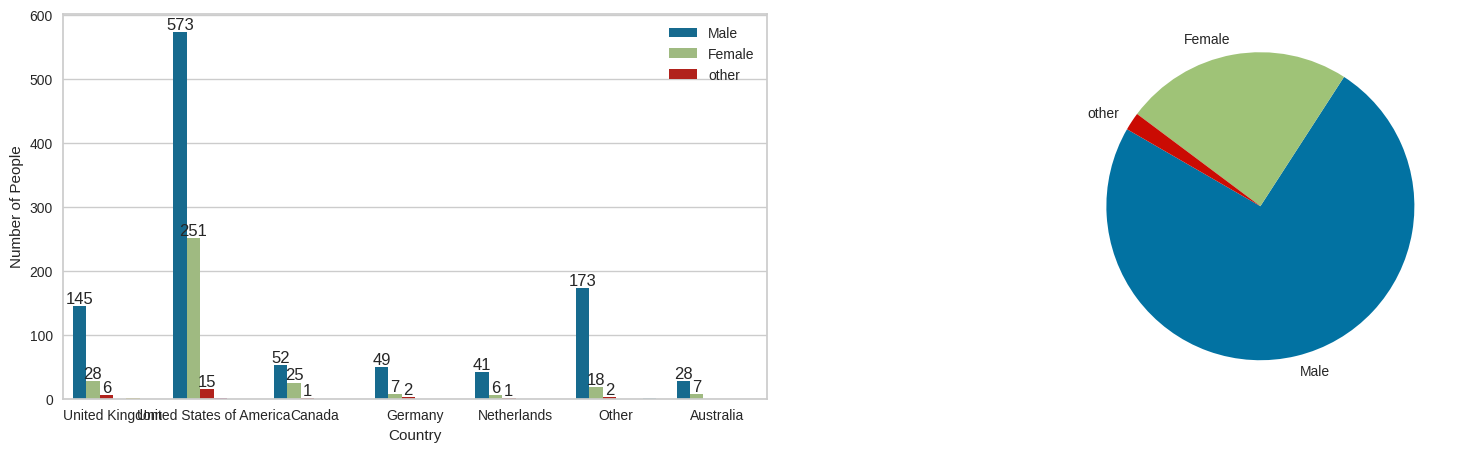

In [ ]:

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = cleaned_df['Country'], hue= cleaned_df['Gender'],)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.ylabel("Number of People")
plt.legend(['Male','Female','other'])
gender_labels = ['Male','Female','other']
values = cleaned_df['Gender'].value_counts()
sizes = [values[0],values[1],values[2]]

plt.subplot(1,2,2)
plt.pie(sizes,labels=gender_labels,startangle=150,pctdistance=0.85)

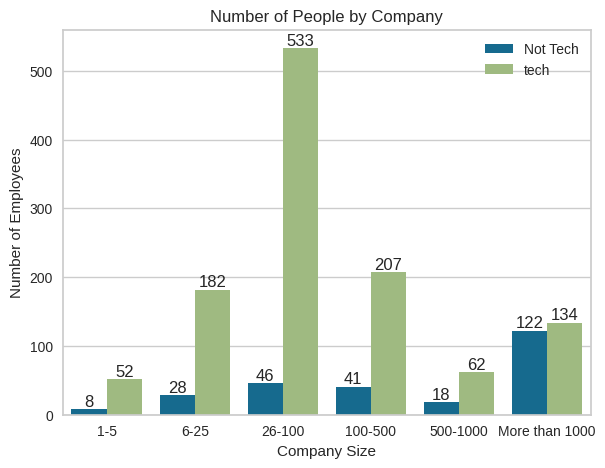

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x = cleaned_df['Number of employees'],hue = cleaned_df['Tech Company'], order = ['1-5','6-25','26-100','100-500','500-1000','More than 1000'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Number of People by Company')
plt.xlabel("Company Size")
plt.ylabel("Number of Employees")
plt.legend(['Not Tech', 'tech'])


In [ ]:
le  = LabelEncoder()

for column in cleaned_df.columns:
  if cleaned_df[column].dtype == 'object':
    cleaned_df[column] = le.fit_transform(cleaned_df[column].astype(str))

<Axes: >

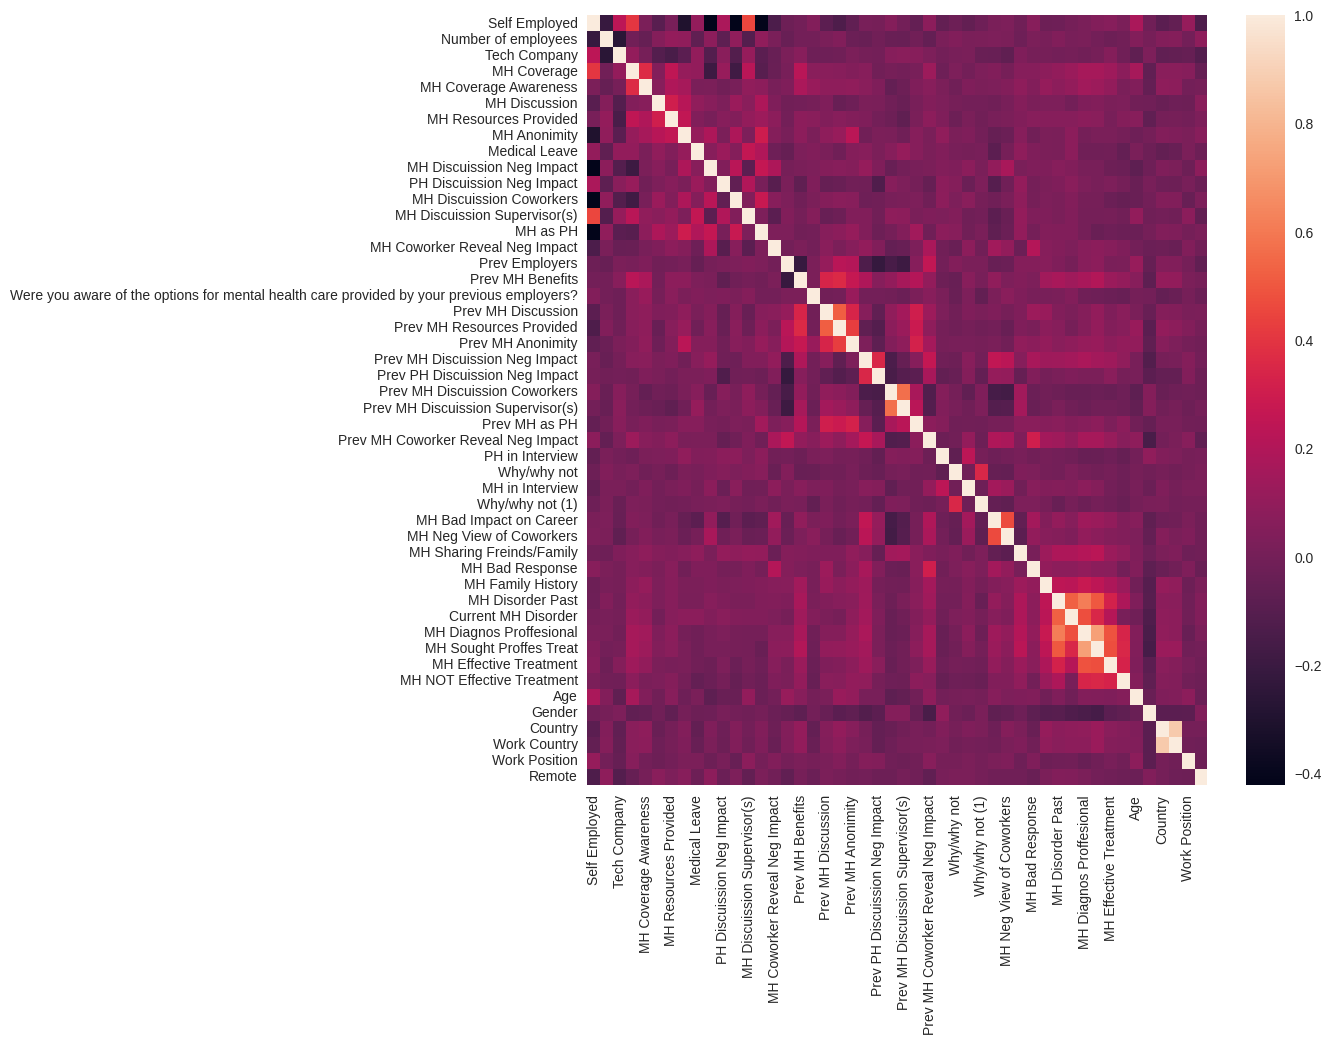

In [ ]:
plt.figure(figsize=(10,10))
cor = np.triu(np.ones_like(cleaned_df.corr(),dtype=bool))
sns.heatmap(cleaned_df.corr())

In [ ]:
corr_matrix = cleaned_df.corr()
threshold = 0.8

for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i ,j]) > threshold:
      cleaned_df.drop(columns=[corr_matrix.columns[i], corr_matrix.columns[j]],inplace=True)


#Dimentionality reduction and clustering

In [ ]:
mca = MCA(n_components=85,n_iter=50)
mca_components=mca.fit(cleaned_df)

In [ ]:
mca_components.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.140,4.73%,4.73%
1,0.112,3.80%,8.53%
2,0.107,3.60%,12.13%
3,0.072,2.43%,14.56%
4,0.067,2.27%,16.83%
...,...,...,...
80,0.015,0.51%,81.91%
81,0.015,0.51%,82.42%
82,0.015,0.50%,82.91%


In [ ]:
mca_coordinates = mca.transform(cleaned_df)
mca_coordinates

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.515973,0.065603,0.129231,-0.159796,0.189937,-0.150700,-0.030759,0.004205,0.318243,-0.237076,...,0.082264,0.197970,0.064934,0.271741,-0.052915,0.024572,0.095295,0.129460,-0.057444,-0.119044
1,0.106730,0.636369,-0.404673,-0.023351,0.070381,-0.053366,0.076088,0.160004,0.159790,-0.041871,...,-0.135515,-0.016337,0.069637,-0.229501,-0.159591,-0.007366,-0.048504,-0.209037,0.028132,0.113466
2,-0.423371,-0.127177,0.119749,0.097388,-0.055869,-0.300567,-0.069029,-0.314921,0.205689,0.227894,...,0.140733,0.077692,-0.224590,0.168547,-0.062332,0.036187,0.106192,-0.004686,0.103257,0.135653
3,0.049014,0.164080,0.563698,-0.090228,-0.061474,-0.020261,-0.016430,0.109751,-0.182795,0.090119,...,0.083385,0.258901,0.045258,0.195707,0.017719,-0.095834,-0.051915,-0.056982,0.058816,-0.003543
4,0.551683,-0.112504,-0.216519,-0.070853,-0.136632,-0.078407,0.029568,-0.134990,-0.111702,-0.109753,...,-0.314144,-0.002196,0.166473,0.063517,-0.021014,0.135926,-0.352054,0.121682,-0.106662,0.095872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,-0.171882,0.199348,0.321923,0.305470,-0.527829,0.122807,-0.058497,-0.081731,-0.011891,-0.130602,...,-0.070300,-0.116839,-0.087503,0.078770,-0.007654,-0.069955,0.242154,-0.108737,-0.015596,0.051115
1429,0.008854,-0.019388,0.548009,-0.258264,0.093500,0.404296,0.133932,0.302693,-0.390317,0.042108,...,0.019283,-0.151117,0.169328,-0.214637,0.100168,0.020162,0.202170,-0.189768,0.207672,-0.064877
1430,0.550160,0.229480,-0.167983,-0.112918,-0.217176,0.272971,-0.048123,-0.099825,0.336231,0.038010,...,-0.017979,0.017703,0.031236,-0.225282,-0.112325,-0.053341,0.213537,-0.030336,0.379833,0.007718
1431,0.266297,-0.072946,-0.100219,-0.083581,0.247079,-0.195908,-0.301385,-0.017983,0.112923,-0.153663,...,-0.118812,-0.116043,-0.112399,0.067587,-0.104111,-0.011738,-0.013434,-0.097216,-0.024928,-0.023656


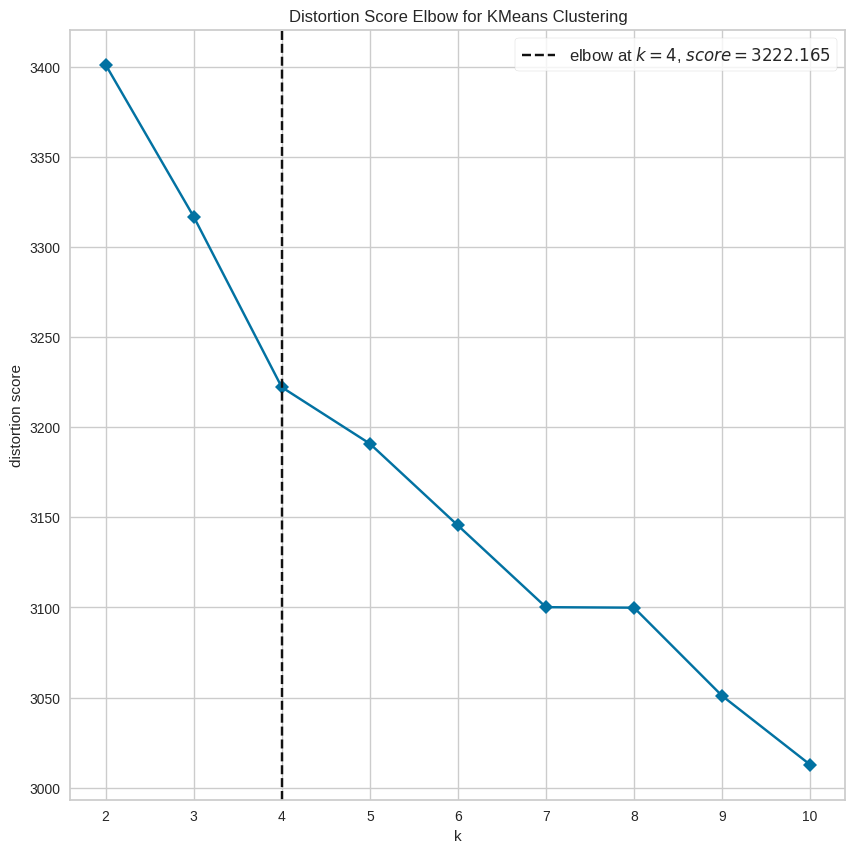

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(init='k-means++')

visualizer = KElbowVisualizer(model,timings=False)
plt.figure(figsize=(10,10))
visualizer.fit(mca_coordinates)
visualizer.show()


In [ ]:
clusters = 4

kmeans = KMeans(n_clusters=clusters)
clustering = kmeans.fit_predict(mca_coordinates)

centers = kmeans.cluster_centers_

labels = kmeans.labels_

In [ ]:
characteristics = []
sizes = []

for i in range(clusters):
  cluster_data = mca_coordinates[labels == i]
  cluster_size = len(cluster_data)
  cluster_center = centers[i]
  sizes.append(cluster_size)

([<matplotlib.patches.Wedge at 0x7cd65bbb8c40>,
 [Text(1.0877993371406454, 0.16337870765914636, 'Cluster 1'),
  Text(0.49627137826208895, 0.9816897265011216, 'Cluster 2'),
  Text(-1.0863248341411509, 0.17291140716621756, 'Cluster 3'),
  Text(0.4876438900948344, -0.9860037710136698, 'Cluster 4')])

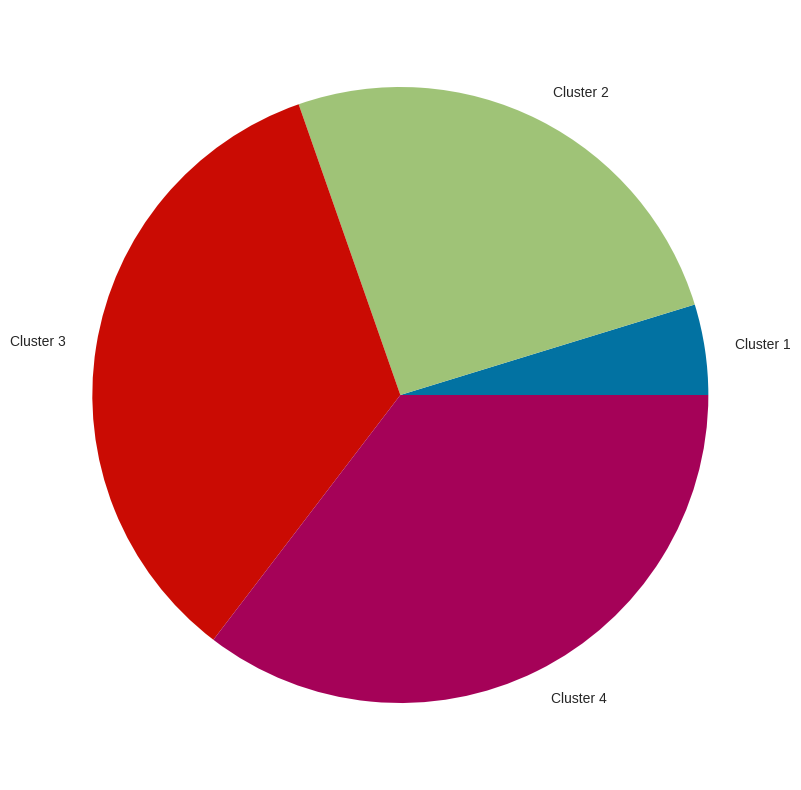

In [ ]:
cl_labels = [f'Cluster {i + 1}' for i in range(clusters)]

def func(val):
  a = np.round(val / 100.*sum(sizes))
  return f'{round(val ,1 )} % ({a})'

plt.figure(figsize=(10,10))
plt.pie(sizes,labels = cl_labels)

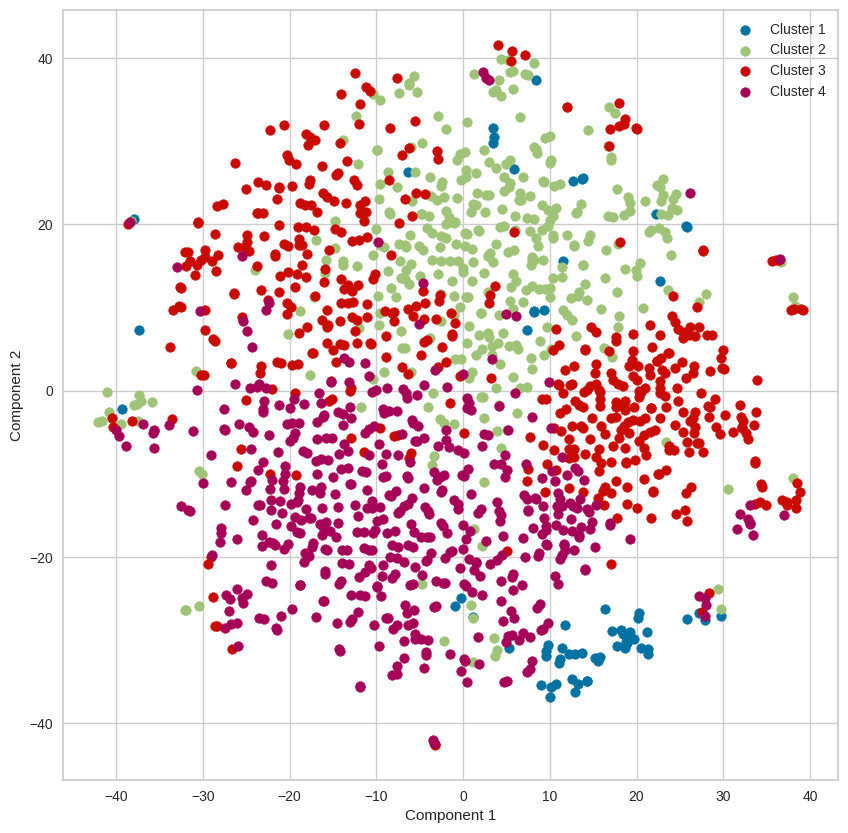

In [ ]:
tsne = TSNE()
projections = tsne.fit_transform(mca_coordinates)


plt.figure(figsize=(10,10))
for i in range(clusters):
  plt.scatter(projections[labels == i][:, 0], projections[labels == i][:, 1], label = f'Cluster {i + 1}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()



In [ ]:
cleaned_df['Cluster'] = labels

def cluster_profiling(data):
  profile = {}
  for columns_name in data.columns:
    if columns_name != 'Cluster':
      profile[f'{columns_name}'] = data[columns_name].value_counts().keys()[0]

  return profile



In [ ]:
profiles = cleaned_df.groupby('Cluster').apply(cluster_profiling)
profiles_df = pd.DataFrame(profiles.tolist(),index=profiles.index)

<ipython-input-116-c421e12c76ad>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profiles = cleaned_df.groupby('Cluster').apply(cluster_profiling)


In [ ]:
profiles_df

,Self Employed,Number of employees,Tech Company,MH Coverage,MH Coverage Awareness,MH Discussion,MH Resources Provided,MH Anonimity,Medical Leave,MH Discuission Neg Impact,...,MH Diagnos Proffesional,MH Sought Proffes Treat,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country,Work Country,Work Position,Remote
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,26-100,1.0,Yes,No,No,No,I don't know,Very easy,No,...,No,0,Not applicable to me,Not applicable to me,30+,Male,United States of America,United States of America,IT Development,Sometimes
1,0,More than 1000,1.0,Yes,Yes,No,Yes,I don't know,Somewhat easy,No,...,Yes,1,Rarely,Often,30+,Male,United States of America,United States of America,IT Development,Sometimes
2,0,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Yes,1,Sometimes,Often,30+,Male,United States of America,United States of America,IT Development,Sometimes
3,0,26-100,1.0,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,No,0,Not applicable to me,Not applicable to me,30+,Male,United States of America,United States of America,IT Development,Sometimes


In [ ]:
profiles_df.to_csv('Final.csv')